# Capítulo 9 - Séries Temporais

Série temporal (ST): conjunto de dados ordenado ao longo do tempo.

Exemplos: cotação de uma moeda, taxa de inflação, população de um país.

Características das séries temporais: importância da ordem cronológica dos dados; existência de fatores deterministicos como tendência (aumento ou diminução a longo prazo), sazonalidade (padrão fixo que se repete no mesmo período de tempo), ciclos (subidas e descidas sem período fixo) e erros aleatórios (fatores inexplicáveis); dificuldade em lidar com outliers (pois são elementos da série); observações altamente correlaciondadas (ex: $t$ e $t+1$).

Num primeiro exemplo apresenta-se o gráfico das cotações diárias do BCP e com as médias móveis de 20, 50 e 100 dias.

         Date    Open    High     Low   Close  Adj Close     Volume
0  2017-04-28  0.2009  0.2069  0.1980  0.2048     0.2048   73049352
1  2017-05-02  0.2053  0.2143  0.2049  0.2137     0.2137  105235623
2  2017-05-03  0.2120  0.2167  0.2102  0.2147     0.2147   88938170
3  2017-05-04  0.2151  0.2260  0.2133  0.2260     0.2260  156357960
4  2017-05-05  0.2250  0.2310  0.2201  0.2300     0.2300  120729301
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object
              Open    High     Low   Close  Adj Close     Volume
Date                                                            
2017-04-28  0.2009  0.2069  0.1980  0.2048     0.2048   73049352
2017-05-02  0.2053  0.2143

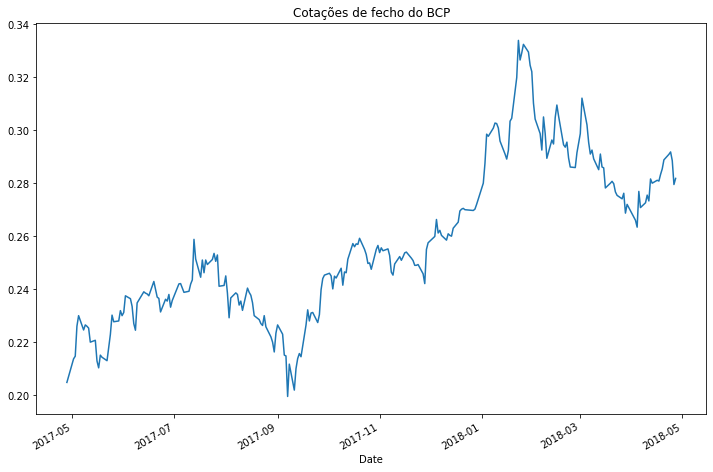

In [ ]:
#antonio.trigo@gmail.com
#aribeiro@iscac.pt

#em casa uma boa ferramenta para se trabalhar é o
#anaconda com o visual studio code

#Se hourver alguma situação em que a bilbioteca nao esteja disponivel façam
#%pip install <bilbioteca> ex: %pip install numpy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import urlib.request

#Ler um ficheiro csv, que neste caso está no github
df_bcp = pd.read_csv('https://raw.githubusercontent.com/atrigo/PyTrigo/master/Versao2/BCP.LS.csv')
#Visualizar as cinco primeiras linhas do dataset (pandas: dataframe)
#Por estar ordenado por ordem cronologica vamos visualizar as cinco mas antigas
print(df_bcp.head())
#Importante para perceber que tipo de dados estão no dataset porque por vezes há erros
print(df_bcp.dtypes)
#Converter a coluna 'Date' para o tipo de dados data
df_bcp['Date'] = pd.to_datetime(df_bcp['Date'], infer_datetime_format = True)
print(df_bcp.dtypes)
#Colocar como indice do meu dataset a data (serie temporal)
df_bcp = df_bcp.set_index('Date')
print(df_bcp.head())
#Mostrar um grafico com a cotacao
df_bcp['Close'].plot(figsize=(12,8),title='Cotações de fecho do BCP')

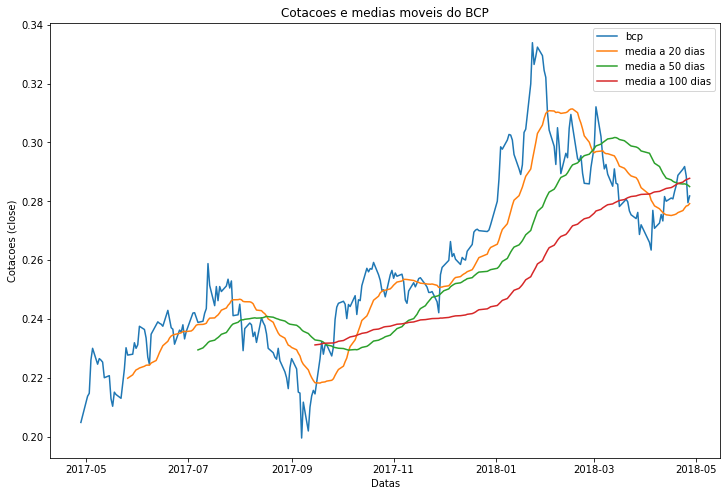

In [ ]:
bcp_ma20 = df_bcp['Close'].rolling(window=20).mean()
bcp_ma50 = df_bcp['Close'].rolling(window=50).mean()
bcp_ma100 = df_bcp['Close'].rolling(window=100).mean()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(df_bcp['Close'], label = 'bcp')
ax.plot(bcp_ma20.index, bcp_ma20 , label = 'media a 20 dias')
ax.plot(bcp_ma50.index, bcp_ma50 , label = 'media a 50 dias')
ax.plot(bcp_ma100.index, bcp_ma100 , label = 'media a 100 dias')
ax.set_xlabel('Datas')
ax.set_ylabel('Cotacoes (close)')
ax.legend()
plt.title('Cotacoes e medias moveis do BCP')
plt.show()

Uma das primeiras tarefas a realizar na análise das ST é verificar os dados para perceber a periodicidade das obervacões, se é ao dia, semana, mês, etc., e inspecionar visualmente as séries através da produção de gráficos das mesmas.

Neste segundo exemplo analisa-se estrutura da ST da variação do número de passageiros ao longo do tempo, com apresentação da tendência, sazonalidade e resíduos.


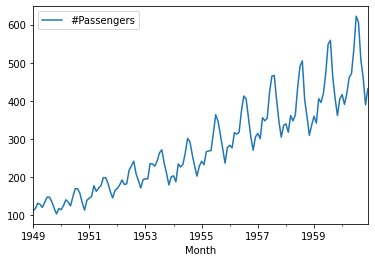

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib.pyplot as plt
import seaborn as sns

df_va = pd.read_csv(
    'https://raw.githubusercontent.com/atrigo/PyTrigo/master/Versao2/AirPassengers.csv')
df_va.head()
df_va['Month'] = pd.to_datetime(df_va['Month'], infer_datetime_format = True)
#print(df_va.dtypes)
#Colocar como indice do meu dataset a data (serie temporal)
df_va = df_va.set_index('Month')
df_va.plot()

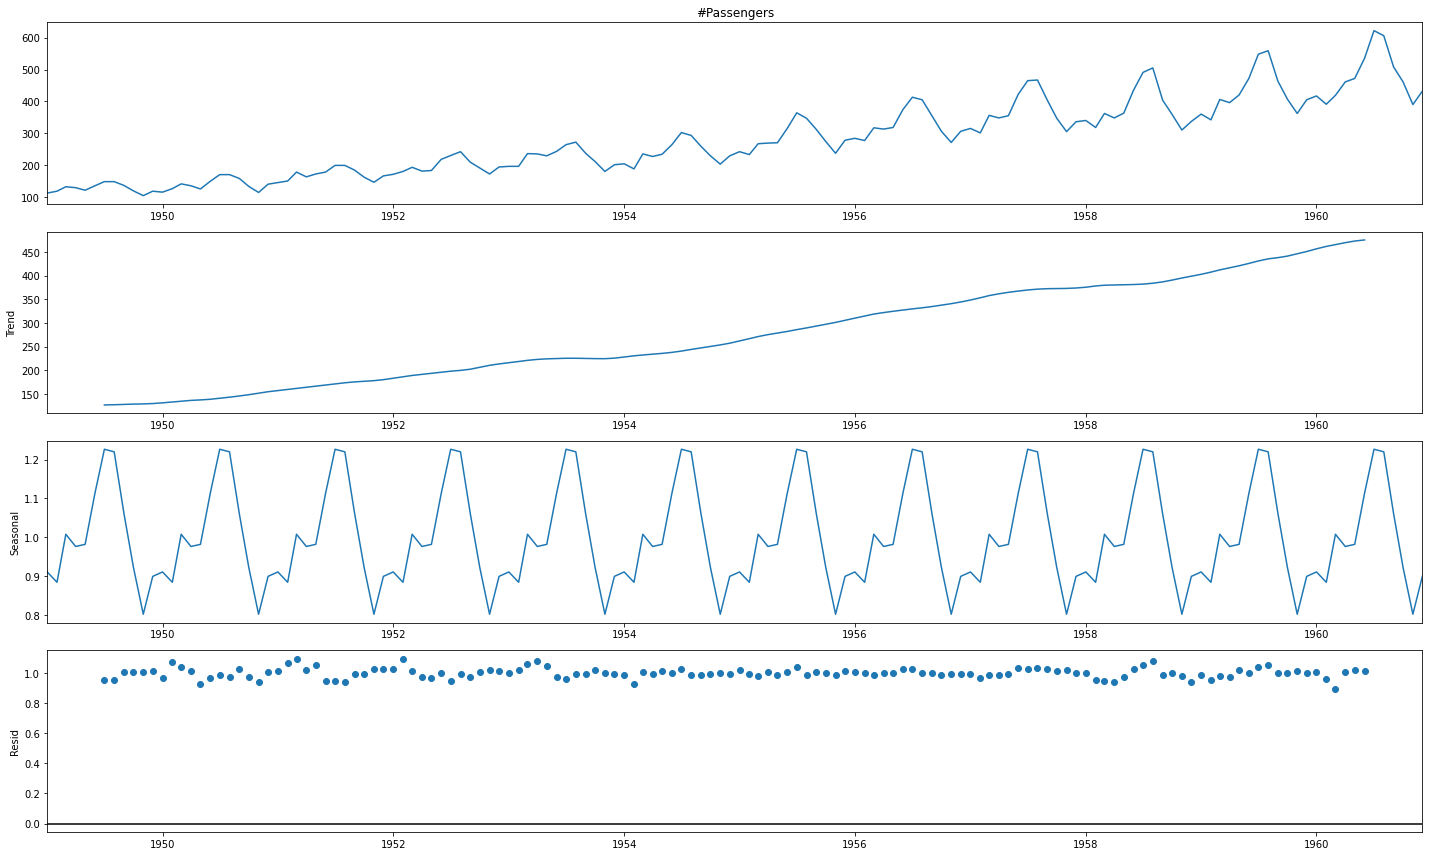

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(df_va['#Passengers'], model='multiplicative', period=12)
fig = res.plot()
fig.set_size_inches((20,12))
fig.tight_layout()
plt.show()

In [ ]:
df_va.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


Nas séries com uma tendência linear é possível definir uma regressão para prever futuros valores em função de valores passados, obtendo-se a seguinte equação:

$y(t) = b_0 + b_1*t + \epsilon_t$, em que:

* $y(t)$ é o valor da ST no momento $t$

* $b_0$ é a ordenada na origem

* $b_1$ é a inclinação da reta

* $t$ é o tempo $t$, a variável independente

* $\epsilon_t$ o erro aleatório da série

Ainda neste segundo exemplo utiliza-se uma regressão linear para prever futuros valores da série. Não será uma das melhores previsões, mas é um exemplo de uma possível previsão de séries temporais.

Utiliza-se o método fit para criar o modelo e o método predict para fazer previsões de futuros valores, que neste caso assentam sobre a reta de regressão descoberta com a execução do método fit.

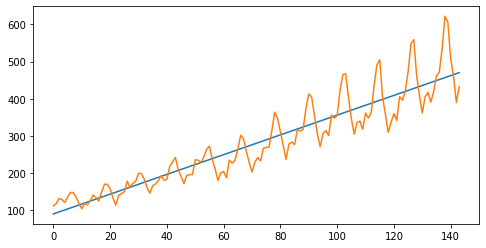

In [ ]:
x = np.arange(len(df_va))
fit = np.polyfit(x, df_va['#Passengers'], deg=1)
plt.figure(figsize=(8,4))
fit_function = np.poly1d(fit)
plt.plot(fit_function(x))
plt.plot(x,df_va['#Passengers'])
plt.show()

In [ ]:
#Para determinar a regressão linear fazemos o fit do modelo OLS (Ordinary Least Squares)
import statsmodels.api as sm
x1 = x
y1 = df_va['#Passengers']
x1 = sm.add_constant(x1)
model_fit = sm.OLS(y1,x1).fit()
print(model_fit.summary())
#Dos resultados é possível ver que tem um R2 de 0.85
#Do modelo podemos ver que a reta de regressão é y = 2.6572*x + 90.31

                            OLS Regression Results                            
Dep. Variable:            #Passengers   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     828.2
Date:                Sun, 04 Dec 2022   Prob (F-statistic):           4.02e-61
Time:                        09:12:34   Log-Likelihood:                -754.82
No. Observations:                 144   AIC:                             1514.
Df Residuals:                     142   BIC:                             1520.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.3100      7.636     11.826      0.0

In [ ]:
#Quantos observacoes temos no dataset?
print("Tamanho do dataset: ", len(df_va))

Tamanho do dataset:  144


In [ ]:
print(x[134:])

[134 135 136 137 138 139 140 141 142 143]


[472.94444444 475.60162835 478.25881226 480.91599617 483.57318008
 486.23036398 488.88754789 491.5447318  494.20191571 496.85909962
 499.51628352 502.17346743 504.83065134]


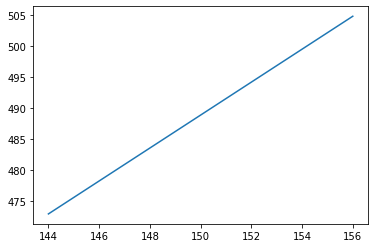

In [ ]:
#Prever o numero de passageiros para o ano seguinte (1 periodo de 12 meses)
#Gerar 12 valores a partir do ultimo mes
x2 = np.arange(144,157)
#print(x2)
#Da função, ou seja, tem de se adicionar a constante
x2_ = sm.add_constant(x2)
#print(x2_)
#Prever
y_pred = model_fit.predict(x2_)
print(y_pred)
plt.plot(x2,y_pred)
plt.show()

Exemplo da variação da inflação ao longo do tempo (pg. 695)

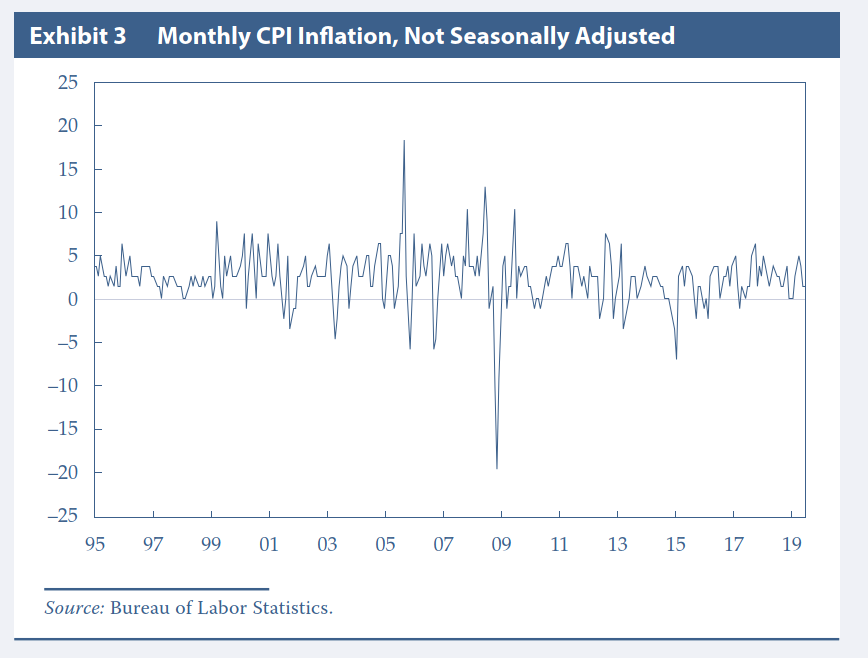

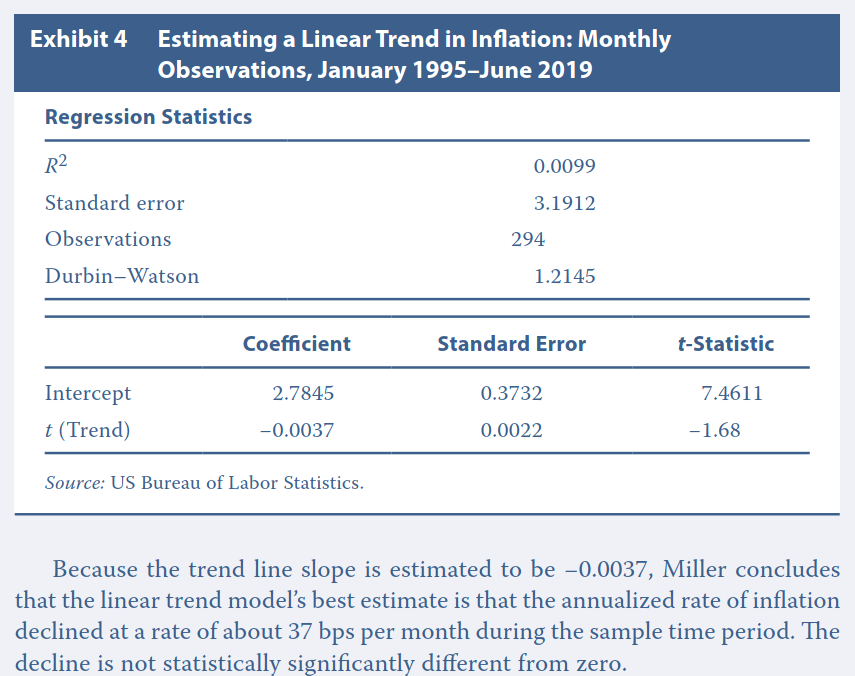

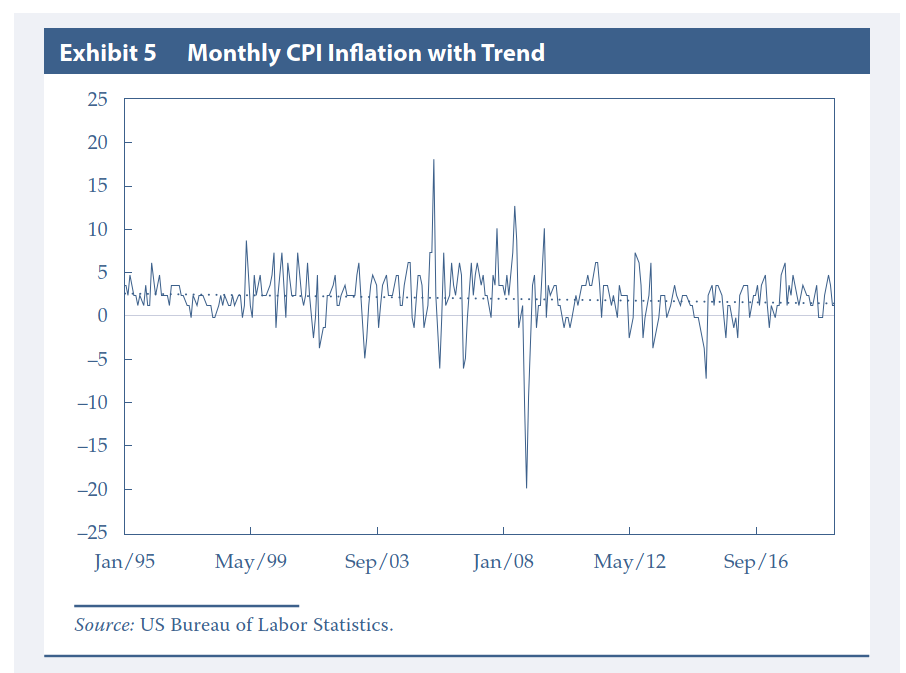

O exemplo seguinte apresenta a utilização do modelo log linear em que a aplicação do logaritmo aos dados permite a utilização da regressão, algo que não seria possível aplicar aos dados no seu formato inicial.

A equação da regressão para estes modelos é a seguinte: $ln (y_t) =  b_0 + b_1 * t + \epsilon_t$

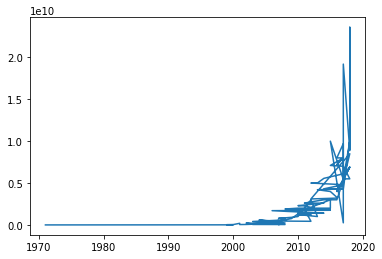

In [ ]:
#Exemplo numero de trasistores ao longo do tempo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib.pyplot as plt
import seaborn as sns

df2 = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv',
                  names=['ano','transistores'])
df2.head()
plt.plot(df2['ano'],df2['transistores'])
#Ordernar os dados por ordem cronologica
#Verificar serie temporal com valor de datas repetidos
df2 = df2.sort_values(by=['ano','transistores'])
#print(df2['ano'].tail(50))

#O grafico apresenta-se com riscos porque existe mais de um valor para cada ano
#Caso queiram podem modificar o dataset para que só tenha um valor por ano descartando algumas linhas

R2 =  0.9615197274213103


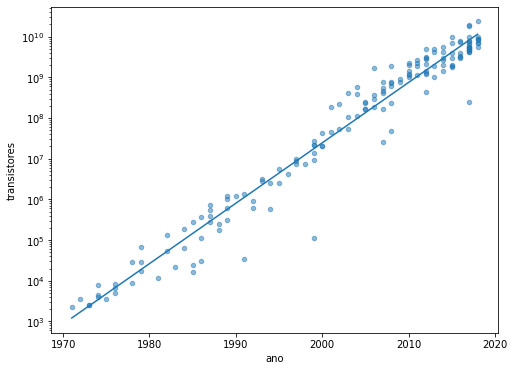

In [ ]:
x3 = df2[['ano']]
y3 = np.log(df2['transistores'])

#%pip install scikit_learn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model_fit2 = model.fit(x3, y3)
y3_pred = np.exp(model.predict(x3))

print('R2 = ', model.score(x3,y3))
fig2, ax2 = plt.subplots(figsize=(8,6))
ax2.plot(x3,y3_pred)
df2.plot(ax=ax2, x='ano',y='transistores', kind='scatter', logy=True, alpha=0.5)
plt.show()

R2 =  0.9615197274213103


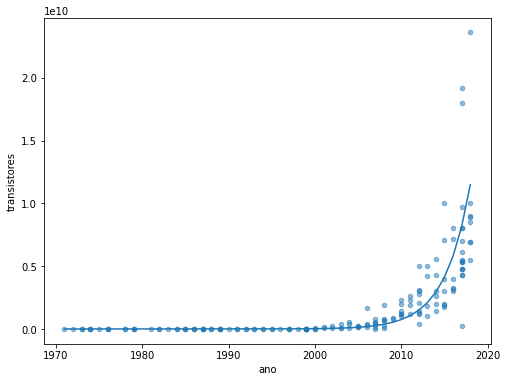

In [ ]:
print('R2 = ', model.score(x3,y3))
fig2, ax2 = plt.subplots(figsize=(8,6))
ax2.plot(x3,y3_pred)
df2.plot(ax=ax2, x='ano',y='transistores', kind='scatter', logy=False, alpha=0.5)
plt.show()


**ST e correlação dos erros dos resíduos**

Nas séries temporais o facto dos erros residuais estarem correlacionados é frequentemente mais crítico do que noutras situações. Para testar se os erros estão ou não correlacionados, como se viu no capítulo anterior utiliza-se o teste de "Durbin Watson (DW)" - um teste para autocorrelação nos resíduos de um modelo estatístico ou análise de regressão. A estatística de Durbin-Watson sempre terá um valor variando entre 0 e 4. Um valor de 2.0 indica que não há autocorrelação detectada na amostra.



Os exemplos anteriores não tiraram partido da definição do que é uma ST no sentido em que se tentou encontrar uma regressão para um conjunto de observações que poderiam ser de outra natureza que não a da ordem cronológica, ou seja, não se tentou avaliar a influência que elementos anteriores têm em elementos posteriores da ST.

Cada elemento da ST refere-se a um determinado momento no tempo sendo que o momento seguinte que quer-se prever é o elemento designado de elemento $t$ e o último conhecido o elemento $t-1$ e penúltimo $t-2$ e assim sucessivamente.

Nas ST procura-se perceber como é que elementos anteriores influenciam elementos posteriores. Um bom exemplo são as temperaturas ao longo do tempo num determinado local. A temperatura do dia seguinte é influenciada pela temperatura do dia anterior e até do dia antes do anterior através da sua influência no dia anterior. Assim procura-se perceber como é que estas variáveis se correlacionam.

No seguinte exemplo é possível ver uma série de temperaturas para um determinado local e verificar que existe um período e que a média e variância são estáveis.

Também é possível verificar a correlação que existe entre o valor $t$ e o valor $t-1$.

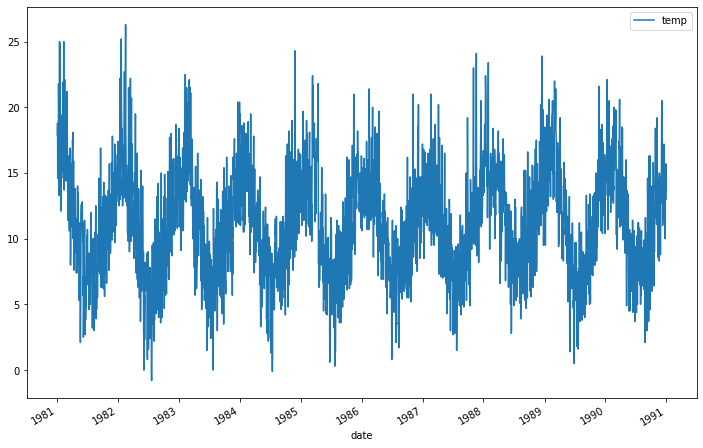

In [ ]:
#Exemplo das temperaturas ao longo do tempo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_temp = pd.read_excel('https://github.com/elysoly/JordanNetwork/blob/master/daily-minimum-temperatures-in-me.xlsx?raw=true',
                        names=['date','temp'])
df_temp.head()
df_temp.set_index(['date'],inplace=True)
df_temp.plot(figsize=(12,8))

In [ ]:
print(df_temp.head()) #É sempre importante observar os dados! Não se esqueçam!

            temp
date            
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8
1981-01-06  15.8


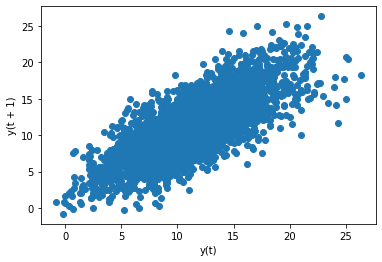

In [ ]:
from pandas.plotting import lag_plot, autocorrelation_plot
lag_plot(df_temp)
#O grafico lag permite ver a relação entre dois valores da série em momentos diferentes no tempo
#lag -> atraso em observações da série
#se a série for ao dia um lag = 1 significa que estamos a testar a série original com uma série desfada em 1 dia
#o que no nosso caso em concreto permite avaliar a relação entre os valores de temperaturas em dias consecutivos

No gráfico anterior foi colocado o gráfico com os valores de $t$ e $t+1$ da série de temperaturas e é possível verificar que estão correlacionadas sendo possível traçar uma reta em que as temperaturas de em $t$ e $t+1$ tem sensivelemente o mesmo valor.

Para verificar esta situação determina-se a correlação entre estes dois valores ao longo da série.

            temp
date            
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8
1981-01-06  15.8
               t   t+1
date                  
1981-01-02   NaN  17.9
1981-01-03  17.9  18.8
1981-01-04  18.8  14.6
1981-01-05  14.6  15.8
1981-01-06  15.8  15.8


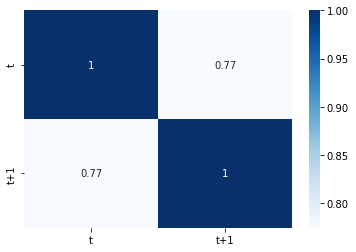

In [ ]:
print(df_temp.head())
df_temp_corr = pd.concat([df_temp.shift(1), df_temp], axis = 1)
df_temp_corr.columns= ['t','t+1']
print(df_temp_corr.head())
sns.heatmap(df_temp_corr.corr(method='pearson'), cmap='Blues', annot=True)

Como se pode ver no resultado da correlação existe uma correlação relativamente forte entre $t$ e $t+1$, com o valor 0.77.

Modelos Auto Regressivos (AR) e ST estacionárias

Os modelos AR são combinações lineares de observações passadas, ou seja, em que se relaciona o valor atual de t com valores anteriores (lag), sendo a equação dos mesmos a seguinte: $x_t = b_0 + b_1*x_{t-1} + b_2*x_{t-2}  + ... + b_p*x_{t-p} + \epsilon_t$ em que $p$ é o número de termos anteriores.

Ex. AR(1) para $x_t$ é $x_t = b_0 + b_1*x_{t-1} + \epsilon_t$

Os modelos AR partem do principio que as séries são fracamente estacionárias ou estacionárias de segunda ordem (média e variância constantes ao longo do tempo), ou seja, que em qualquer momento do tempo o valor a autocovariância entre diferentes elementos da ST não depende de $t$ mas da diferença entre os dois momentos $t$ e $t+h$.

Para determinar o lag (diferença de tempo) ideal para aplicar o modelo AR recorre-se à Partial Autocorrelation Function (PACF) que nos dá a correlação do termo t com cada um dos termos anteriores da série (sé com a influência direta de cada termo anterior não considerando as influências indiretas).

No exercício seguinte verifica-se se a série é estacionária (teste de Dickey-Fuller) e apresenta-se o gráfico PACF para o exemplo que se está a utilizar.

P-value:  0.0003793972522200688


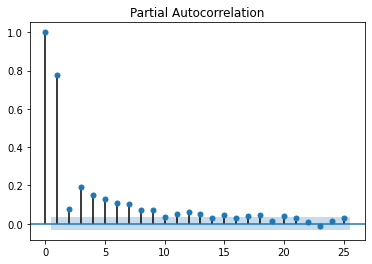

In [ ]:
from statsmodels.tsa.stattools import adfuller
df_stationarityTest = adfuller(df_temp['temp'], autolag='AIC')
print("P-value: ", df_stationarityTest[1])
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(df_temp['temp'], lags=25)

Olhando para os resultados acima chega-se à conclusão que a série é estacionária e que iremos necessitar de 15 termos pois só a partir do 16 é que os pontos ficam dentro do intervalo de confiança. Assim o nosso modelo vai ser um AR(15).

Nota: o primeiro termo a correlação é 0 porque é com ele mesmo (lag =0).

De seguida apresenta-se a execução do modelo para este dataset com o valor de 15 para o AR.

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

#print(df_temp.shape)
#print(len(df_temp))
x4 = df_temp.values
train, test = x4[:len(x4)-7], x4[len(x4)-7:]
model_fit = AutoReg(train, lags = 15).fit()
print(model_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 3642
Model:                    AutoReg(15)   Log Likelihood               -8337.232
Method:               Conditional MLE   S.D. of innovations              2.410
Date:                Sun, 04 Dec 2022   AIC                              1.769
Time:                        13:18:16   BIC                              1.798
Sample:                            15   HQIC                             1.779
                                 3642                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7446      0.144      5.167      0.000       0.462       1.027
y.L1           0.5980      0.017     36.049      0.000       0.566       0.631
y.L2          -0.0882      0.019     -4.564      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


Utilizando o modelo anterior passa-se a previsão dos valores da temperatura para os próximos 7 dias, apresentando um gráfico com os valores previstos e reais.

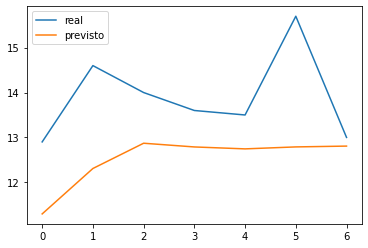

In [ ]:
#y_pred = model_predict(start=len(train) ...
y_pred = model_fit.predict(start=len(x4)-7, end=len(x4)-1, dynamic=False)
plt.plot(test,label='real')
plt.plot(y_pred,label='previsto')
plt.legend()
#VErificar o porque de dar uma curva sem estar mais proximo do forma dos valores

Como se pode ver os valores previstos não estão muito longe dos valores reais.

No exercício anterior foi utilizado o slicing para fazer a divisão dos elementos do conjunto original em dois conjuntos, treino e teste, um para fazer o fit do modelo e outro para comparar os valores previstos.

De seguida mostra-se um exemplo simples de slicing para compreender melhor como se faz.

In [ ]:
#slicing
v = [4,5,6,7,3,2]

print(v[:4])
print(v[4:])

[4, 5, 6, 7]
[3, 2]


Exercício: realize os passos do exemplo anterior para o seguinte dataset relativo aos consumos de eletricidade: https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv


Nos modelos AR como referido anteriormente as ST têm de ser estacionárias (média e variância constantes) e o resíduo $e_t$,  a componente aleatória da ST, deve vir de um processo de ruído branco (media = 0, std constante, corr entre lags = 0) e independente para as observações $x_t$, $x_{t-1}$, etc.


No estudo das ST a escolha a janela temporal a analisar pode ter impactos significativos no modelo selecionado para estimar a ST, pois em janelas de tempo diferentes ela pode ter características diferentes, o que torna o processo de modelação particularmente dificil. Por exemplo, numa determinada janela de tempo um modelo AR(1) pode ser bom para estimar as vendas de uma empresa enquanto que noutras janelas de tempo o AR(2) pode ser melhor.

As Random Walks (passeios aleatórios) são das ST mais estudadas na área financeira e caracterizam-se pelo facto de num determinado período de tempo ($t$) serem iguais ao valor da ST no período anterior ($t-1$) adicionada de um erro imprevísivel ($\epsilon_t$).

As RW não podem ser estimadas utilizando modelos AR, pois não são ST estacionárias, uma vez que a autocovariância depende do tempo. UM RW com tendência viola os dois princípios da ST estacionária.

No entanto, uma ST do tipo RW pode ser modelada aplicando uma transformação, designada de diferenciação de 1ª ordem  (em inglês first-differencing) é possível obter um ruído branco que é um processo estacionário e aplicar-lhe um modelo AR.

$y_t = x_t - x_{t-1} = \epsilon_t$

Em que a $E(\epsilon_t) = 0$, $E(\epsilon_t^2) = \sigma^2$ e $cov(e_t,e_s) = 0$ para $t \neq s$

Este modelo é muito utilizado na modelação e previsão de séries financeiras não estacionárias como é o caso da variação do preço das ações, em que as melhores previsões para o dia de amanhã são os valores observados hoje.

Não obstante existem também RW com tendência em que é preciso aplicar transformações para poder modelar as mesmas com recurso a AR, nomeadamente a difernciação de 1ª ordem apresentada anteriormente.

Para verificar que as ST derivadas de um modelo RW transformado que se pretende modelar com AR são estacionárias verifica-se a existência de raízes unitárias através de testes existentes na literatura como o anteriormente mencionado Dickey-Fuller.

ST e médias móveis (em inglês Moving Averages (MA))

Algumas ST (muitas no dominio financeiro) seguem outro modelo, o das médias móveis, cuja equação é a seguinte:

$x_t = ϵ_t + θ{ϵ_{t-1}}, E(ϵ_t) = 0, E(ϵ_t^2) = σ^2, cov(ϵ_t,ϵ_s) = 0$ para $t \neq s$

Este modelo é designado de MA(1) em que o parametro do modelo é o $θ$ neste caso igual a 1.

Caso o $\theta$ seja diferente de 1 tem de se entrar com os $ϵ$ correspondentes, ou seja, $x_t = ϵ_t + θ{ϵ_{t-1}} + + θ_2{ϵ_{t-2}} + ... + θ_q{ϵ_{t-q}}$



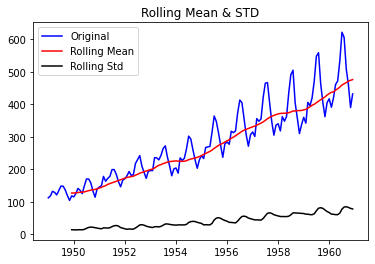

In [ ]:
#Exemplo retirado de
#https://www.kaggle.com/code/arezoodahesh/air-passengers-classical-time-series-models

import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from scipy.special import boxcox, inv_boxcox
from scipy import stats
#from pmdarima import auto_arima

df = pd.read_csv('https://raw.githubusercontent.com/atrigo/PyTrigo/master/Versao2/AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'],format="%Y-%m")
df = df.set_index('Month')
df.head()
length_train = math.floor(len(df["#Passengers"])*0.8)
train = df[:length_train]
test = df[length_train:]
rolmean = df.rolling(window=12).mean()
rolstd = df.rolling(window=12).std()
orig = plt.plot(df, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & STD')
plt.show()

--------------------------------------------------
      fitted_lambda is:  0.14802265137037945
-------------------------------------------------- 



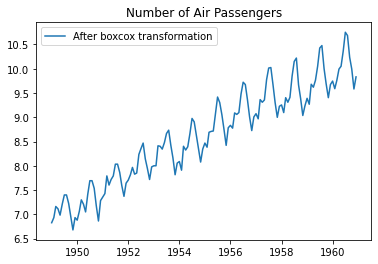

In [ ]:
#eliminação variância não constante
fitted_data, fitted_lambda = stats.boxcox(df['#Passengers'])
print('-'*50)
print(' '*5,'fitted_lambda is: ',fitted_lambda)
print('-'*50,'\n')
data_boxcox = pd.Series(stats.boxcox(df['#Passengers'],fitted_lambda),index=df.index)
plt.plot(data_boxcox, label="After boxcox transformation")
plt.legend()
plt.title("Number of Air Passengers")
plt.show()

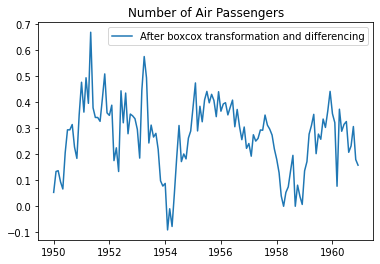

In [ ]:
#eliminação dos componentes sazonais xom deslocação nos dados de 12 meses
data_boxcox_diff_12= pd.Series(data_boxcox - data_boxcox.shift(periods=12), index=df.index)
data_boxcox_diff_12.dropna(inplace=True)
plt.plot(data_boxcox_diff_12, label="After boxcox transformation and differencing")
plt.legend()
plt.title("Number of Air Passengers")
plt.show()

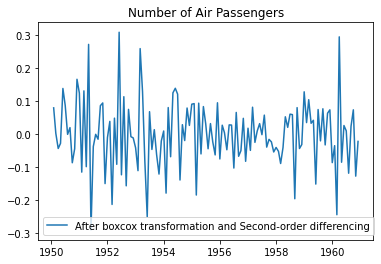

In [ ]:
#diferenciacao de segunda ordem (elimnacao da media não constante)
data_boxcox_second_order_diff= pd.Series(data_boxcox_diff_12 - data_boxcox_diff_12.shift(), index=df.index)
data_boxcox_second_order_diff.dropna(inplace=True)
plt.plot(data_boxcox_second_order_diff, label="After boxcox transformation and Second-order differencing")
plt.legend()
plt.title("Number of Air Passengers")
plt.show()

In [ ]:
#divisao dos dasets em treino e teste
train_boxcox_second_order_diff = data_boxcox_second_order_diff[:length_train]
test_boxcox_second_order_diff = data_boxcox_second_order_diff[length_train:]

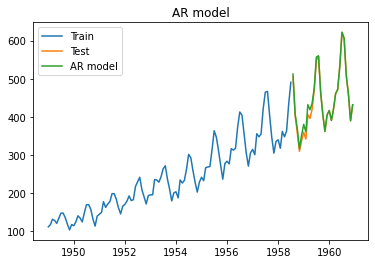

In [ ]:
#Modelo AR
model_ar = ARIMA(train_boxcox_second_order_diff, order=(12,0,0))
model_fit_ar = model_ar.fit()
model_fit_ar.summary()
predictions_AR_diff = pd.Series(model_fit_ar.fittedvalues, copy=True)
predictions_AR_diff_cumsum = predictions_AR_diff.cumsum()
predictions_AR_boxcox = pd.Series(data_boxcox, index=data_boxcox.index)
predictions_AR_boxcox = predictions_AR_boxcox.add(predictions_AR_diff_cumsum, fill_value=0)
predictions_AR = inv_boxcox(predictions_AR_boxcox, fitted_lambda)
plt.plot(train['#Passengers'], label = 'Train')
plt.plot(test['#Passengers'], label = 'Test')
plt.plot(predictions_AR[test.index.min():], label = 'AR model')
plt.legend()
plt.title('AR model')
plt.show()

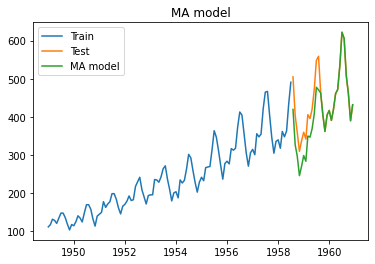

In [ ]:
#Modelo MA
model_ma = ARIMA(train_boxcox_second_order_diff, order=(0,0,12))
model_fit_ma = model_ma.fit()
model_fit_ma.summary()
pred_MA_diff = pd.Series(model_fit_ma.fittedvalues, copy=True)
pred_MA_diff_cumsum = pred_MA_diff.cumsum()
pred_MA_boxcox = pd.Series(data_boxcox, index=data_boxcox.index)
pred_MA_boxcox = pred_MA_boxcox.add(pred_MA_diff_cumsum, fill_value=0)
pred_MA = inv_boxcox(pred_MA_boxcox, fitted_lambda)
plt.plot(train['#Passengers'], label = 'Train')
plt.plot(test['#Passengers'], label = 'Test')
plt.plot(pred_MA[test.index.min():], label = 'MA model')
plt.legend()
plt.title('MA model')
plt.show()

Modelos Autoregressive Moving Averages (ARMA)

Os modelos ARMA(p,q) possuem termos dos modelos AR(p) e termos dos modelos MA(q).

$X_t = c + ϵ_t + ∑_{i=1}^p {ϕ_i} {X_{t-i}} + ∑_{i=1}^q ϵ_{t-i}$

Os modelos ARMA são utilizados em ST estacionárias.


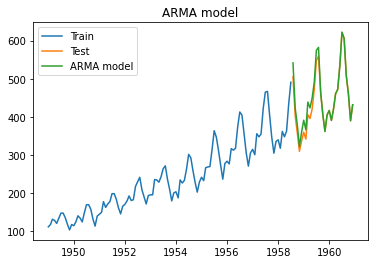

In [ ]:
#Modelo ARMA
model_arma = ARIMA(train_boxcox_second_order_diff, order=(6,0,6))
model_fit_arma = model_arma.fit()
model_fit_arma.summary()
pred_ARMA_diff = pd.Series(model_fit_arma.fittedvalues, copy=True)
pred_ARMA_diff_cumsum = pred_ARMA_diff.cumsum()
pred_ARMA_boxcox = pd.Series(data_boxcox, index=data_boxcox.index)
pred_ARMA_boxcox = pred_ARMA_boxcox.add(pred_ARMA_diff_cumsum, fill_value=0)
pred_ARMA = inv_boxcox(pred_ARMA_boxcox, fitted_lambda)
plt.plot(train['#Passengers'], label = 'Train')
plt.plot(test['#Passengers'], label = 'Test')
plt.plot(pred_ARMA[test.index.min():], label = 'ARMA model')
plt.legend()
plt.title('ARMA model')
plt.show()


In [ ]:
#Mais modelos
#ARIMA
#LSTM